# MODELS

In [2]:
import numpy as np
import pandas as pd

X_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_train_3", index_col=0)
X_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/X_test_3", index_col=0)

y_train = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_train", index_col=0)
y_test = pd.read_csv("C:/Users/Fernando/Desktop/Proyecto_Final_ML/data/y_test", index_col=0)

In [3]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Normalization

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## Logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")

model_LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
predictions_LR = model_LR.predict(X_test)

In [6]:
predictions_proba_LR = model_LR.predict_proba(X_test)

In [7]:
model_LR.score(X_train, y_train)

0.5673214842531962

In [8]:
model_LR.score(X_test, y_test)

0.5537540533798953

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.28      0.75      0.41       815
           1       0.89      0.50      0.64      3194

    accuracy                           0.55      4009
   macro avg       0.58      0.63      0.52      4009
weighted avg       0.77      0.55      0.59      4009



In [10]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, predictions_LR)
print(c_matrix)

[[ 615  200]
 [1589 1605]]


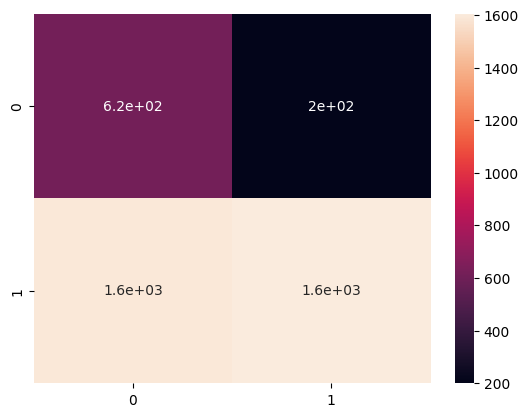

In [12]:
import seaborn as sns

sns.heatmap(c_matrix, annot=True);

## Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=15, random_state=42)

model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
model_DT_predictions = model_DT.predict(X_test)

In [17]:
model_DT_proba = model_DT.predict_proba(X_test)

In [18]:
model_DT.score(X_train, y_train)

0.6951668225756158

In [19]:
model_DT.score(X_test, y_test)

0.5744574706909453

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_DT_predictions))

              precision    recall  f1-score   support

           0       0.26      0.61      0.37       815
           1       0.85      0.57      0.68      3194

    accuracy                           0.57      4009
   macro avg       0.56      0.59      0.52      4009
weighted avg       0.73      0.57      0.62      4009



## VECTORES MACHINES (SVC)

In [21]:
from sklearn.svm import SVC

model_SVC = SVC(kernel="linear", C=1, class_weight= 'balanced')

model_SVC.fit(X_train, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [22]:
model_SVC_predictions = model_SVC.predict(X_test)

In [23]:
model_SVC.score(X_train, y_train)

0.5478640473963206

In [24]:
model_SVC.score(X_test, y_test)

0.5370416562733848

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_SVC_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.28      0.78      0.41       815
           1       0.89      0.47      0.62      3194

    accuracy                           0.54      4009
   macro avg       0.59      0.63      0.51      4009
weighted avg       0.77      0.54      0.58      4009



### Balanceado de muestras

In [5]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos por clase y creación de diccionario para uso en modelos
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

In [ ]:
# APLICACIÓN DE SMOTE

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)


In [ ]:
# MODELO TREE DECISSION

model_DT.fit(X_resampled, y_resampled)


,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
model_DT_predictions = model_DT.predict(X_test)

print(classification_report(y_test, model_DT_predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.29      0.32      0.30       815
           1       0.82      0.80      0.81      3194

    accuracy                           0.70      4009
   macro avg       0.55      0.56      0.56      4009
weighted avg       0.71      0.70      0.71      4009



In [36]:
# APLICACIÓN DE ADASYN

from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(X_train, y_train)

In [37]:
#MODELO TREE DECISSION

model_DT.fit(X_resampled, y_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


{np.int64(0): np.float64(2.4730104873534855),
 np.int64(1): np.float64(0.6267099194872195)}

# PIPELINES

In [17]:
# Load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight

# class weight calculating
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Set random seed
np.random.seed(0)



pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Cambiamos el scaler y el classifier con otros metodos de pretratamiento y modelo

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weights_dict),
                    LogisticRegression(max_iter=100, solver='liblinear', class_weight=class_weights_dict)],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__random_state': [42]
}

random_forest_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier': [RandomForestClassifier( class_weight="balanced")],
    'classifier__max_depth': [15, 30],
    'classifier__n_estimators': [200, 500],
    'classifier__random_state': [42]
}

svm_param = {
    'classifier': [svm.SVC(probability=True, class_weight=class_weights_dict)],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'classifier__C': [0.1, 5, 25, 100],
    'classifier__degree': [1,2,3,4],
    'classifier__gamma': ['scale', 'auto'],
}

search_space = [
    logistic_params,
    random_forest_params,
    svm_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  n_jobs=-1,
                  verbose=False)

In [ ]:
model_gridsearch_1= clf.fit(X_train, y_train)